In [3]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")


In [4]:
type(dataset), type(dataset["data"]),type(dataset["target"])

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [5]:
X, y = dataset["data"], dataset["target"]

In [6]:
X=X/255

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
img_1 = X[1,:].reshape(28,28)

In [10]:
import matplotlib.pyplot as plt

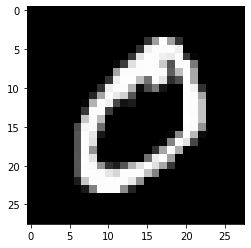

In [11]:
plt.imshow(img_1,cmap='gray')
plt.show()

In [12]:
y[1]

'0'

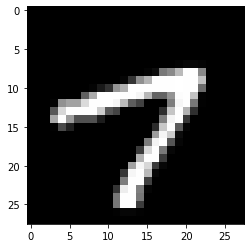

In [13]:
img_2 = X[101,:].reshape(28,28)
plt.imshow(img_2,cmap='gray')
plt.show()

In [14]:
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [15]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [16]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

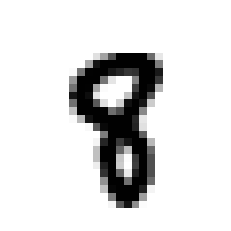

[0.]


In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])


In [18]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [19]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [20]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6780408776417199
Epoch 100 cost:  1.707702321793257e-05
Epoch 200 cost:  1.678816031514583e-05
Epoch 300 cost:  1.650965188565313e-05
Epoch 400 cost:  1.624093606712167e-05
Epoch 500 cost:  1.5981491451608275e-05
Epoch 600 cost:  1.5730833482190306e-05
Epoch 700 cost:  1.5488511229804483e-05
Epoch 800 cost:  1.5254104504150464e-05
Epoch 900 cost:  1.5027221258817602e-05
Epoch 1000 cost:  1.4807495256156456e-05
Epoch 1100 cost:  1.4594583961953188e-05
Epoch 1200 cost:  1.4388166643867825e-05
Epoch 1300 cost:  1.4187942650918769e-05
Epoch 1400 cost:  1.3993629854148815e-05
Epoch 1500 cost:  1.380496323107015e-05
Epoch 1600 cost:  1.3621693578608548e-05
Epoch 1700 cost:  1.3443586341087435e-05
Epoch 1800 cost:  1.3270420541402657e-05
Epoch 1900 cost:  1.3101987804895024e-05
Final cost: 1.2939708593494627e-05


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))


[[10000]]


In [22]:
print(classification_report(predictions, labels))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

